<font size="5"> Assignment 02 Visualizing Data for Logistic Regression STA 6238</font> <br>\
<font size="5"> Mina Akhondzadeh</font>

The dataset is about loan eligibility prediction. I downloaded it from Kaggle: <br>
https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?resource=download

In [18]:
library(ggplot2)
library(dplyr)
library(tidyverse)

In [2]:
#Read in the data
df = read_csv("loan_dataset.csv")
head(df)

Rows: 480 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Gender, Married, Dependents, Education, Self_Employed, Property_Area
dbl (5): ApplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Loan...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Male,Yes,1,Graduate,No,4583,128,360,1,Rural,0
Male,Yes,0,Graduate,Yes,3000,66,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2583,120,360,1,Urban,1
Male,No,0,Graduate,No,6000,141,360,1,Urban,1
Male,Yes,2,Graduate,Yes,5417,267,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2333,95,360,1,Urban,1


In [3]:
#Lets convert Loan_Status and Credit_History values to factors
df$Loan_Status = as.factor(df$Loan_Status)
df$Credit_History = as.factor(df$Credit_History)

**<font size="5"> Distribution of dependent data:</font>**

In [4]:
M_plot <- df %>%
    group_by(Loan_Status) %>% 
    summarize(count = n()) %>%
    mutate( percent = 100 * count / sum(count),
           label = paste0(count, ", ", round(percent), "%"))

In [5]:
M_plot %>% select(-label)

Loan_Status,count,percent
<fct>,<int>,<dbl>
0,148,30.83333
1,332,69.16667


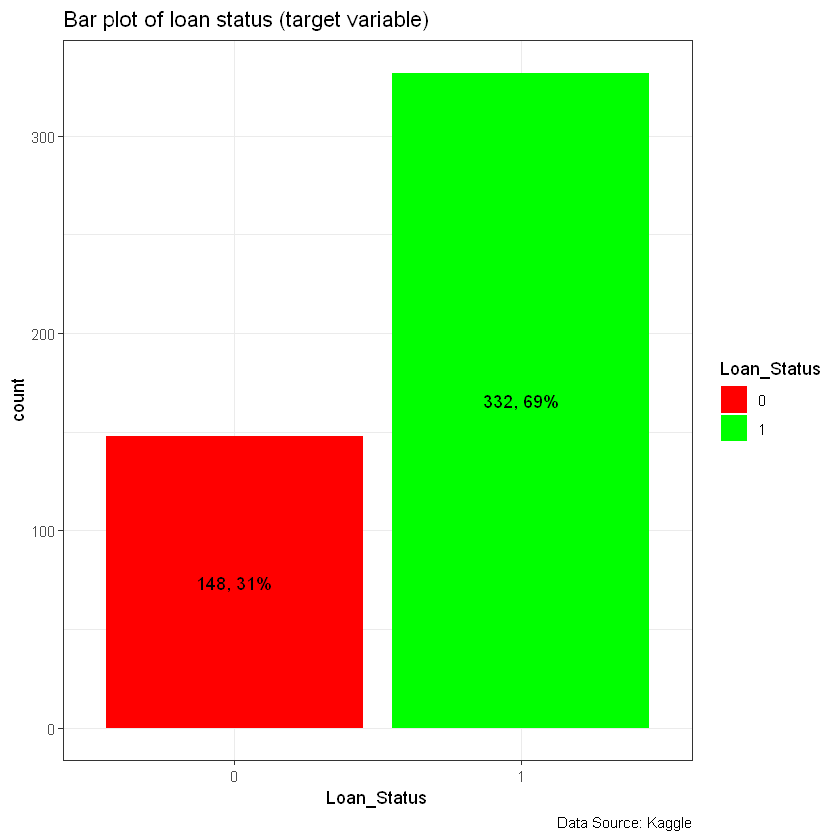

In [6]:
ggplot(M_plot) +
aes(x=Loan_Status, y=count, label=label, fill=Loan_Status) +
geom_col() +
geom_text(position = position_stack(0.5)) +
scale_fill_manual(values = c("red", "green")) +
theme_bw() +
labs(
    title = "Bar plot of loan status (target variable)",
    caption = "Data Source: Kaggle")

**<font size="5"> Distribution of independent data:</font>**

In [7]:
M_plot <- df %>%
    group_by(Credit_History) %>%
    summarize(count = n()) %>%
    mutate( percent = 100*count / sum(count),
            label = paste0(count,", ",round(percent),"%"))

In [8]:
M_plot %>% select(-label)

Credit_History,count,percent
<fct>,<int>,<dbl>
0,70,14.58333
1,410,85.41667


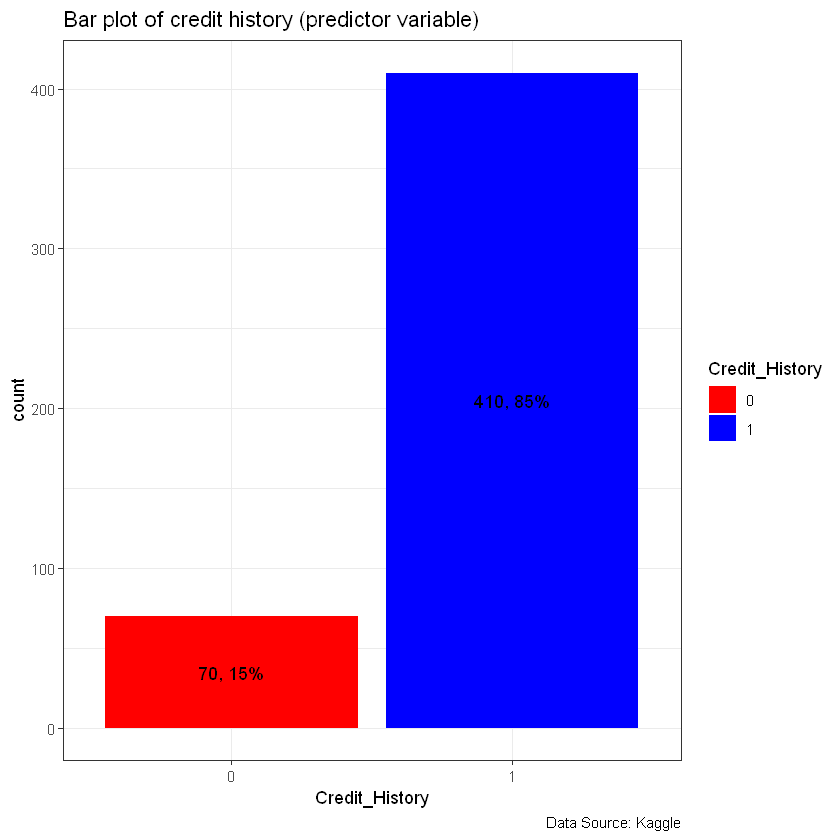

In [9]:
ggplot(M_plot)+
aes(x = Credit_History,y = count, label = label, fill = Credit_History) +
geom_col() +
geom_text(position = position_stack(0.5)) +
scale_fill_manual(values = c("red", "blue")) +
theme_bw() +
labs(
    title = "Bar plot of credit history (predictor variable)",
    caption = "Data Source: Kaggle")

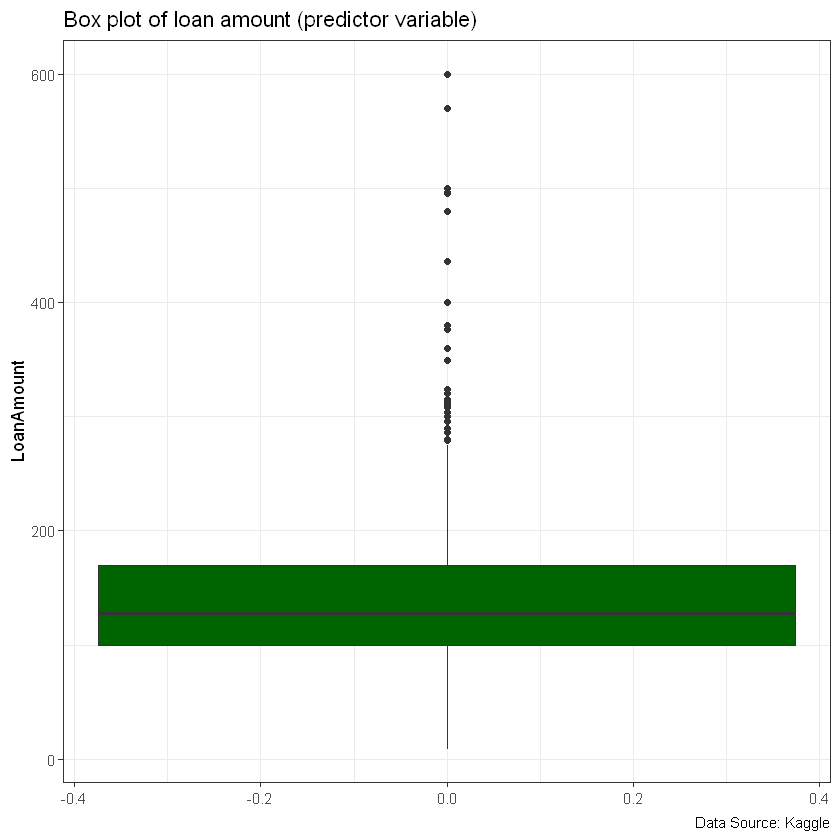

In [10]:
ggplot(df)+
aes(y = LoanAmount) +
geom_boxplot(fill = "darkgreen") +
theme_bw() +
labs(
    title = "Box plot of loan amount (predictor variable)",
    caption = "Data Source: Kaggle")

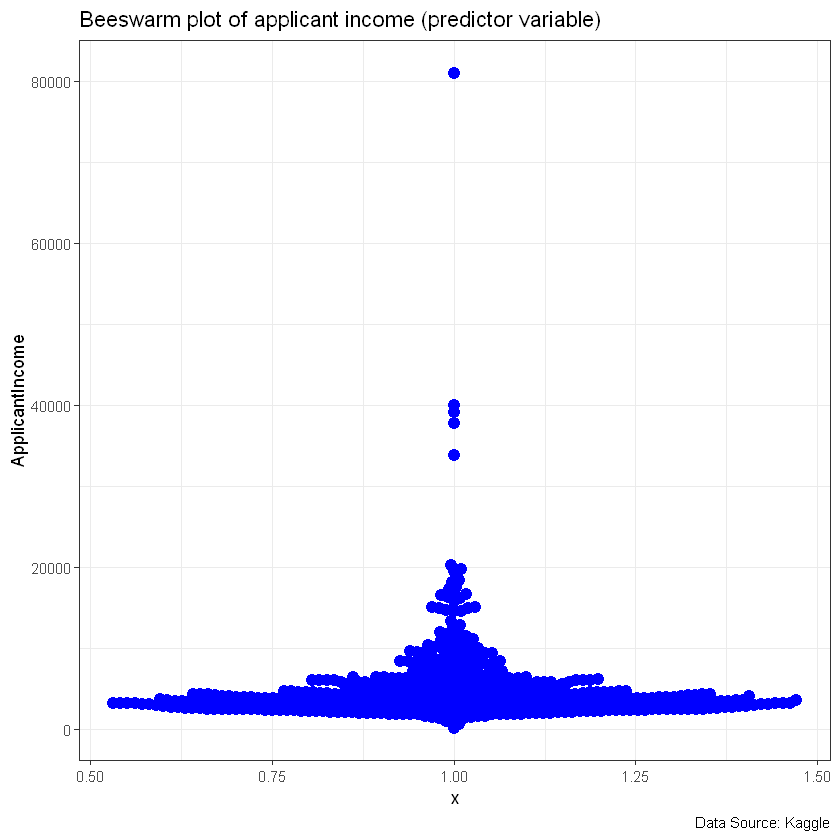

In [11]:
ggplot(df) +
aes(x=1, y=ApplicantIncome) +
ggbeeswarm::geom_beeswarm(size = 3, color = "blue") + 
theme_bw() +
labs(
    title = "Beeswarm plot of applicant income (predictor variable)",
    caption = "Data Source: Kaggle")

In [12]:
head(df)


Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>
Male,Yes,1,Graduate,No,4583,128,360,1,Rural,0
Male,Yes,0,Graduate,Yes,3000,66,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2583,120,360,1,Urban,1
Male,No,0,Graduate,No,6000,141,360,1,Urban,1
Male,Yes,2,Graduate,Yes,5417,267,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2333,95,360,1,Urban,1


**<font size="5"> One-way Plots:</font>**

In [13]:
M_plot <- df %>% 
    group_by(
        Credit_History, Loan_Status) %>%
    summarize(
        count = n()) %>%
    ungroup() %>%
    mutate(
        percent = 100*count/sum(count), 
    label = paste0(count, "\n", round(percent), "%"))

`summarise()` has grouped output by 'Credit_History'. You can override using the `.groups` argument.


In [14]:
M_plot %>% select(-label)

Credit_History,Loan_Status,count,percent
<fct>,<fct>,<int>,<dbl>
0,0,63,13.125000
0,1,7,1.458333
1,0,85,17.708333
1,1,325,67.708333


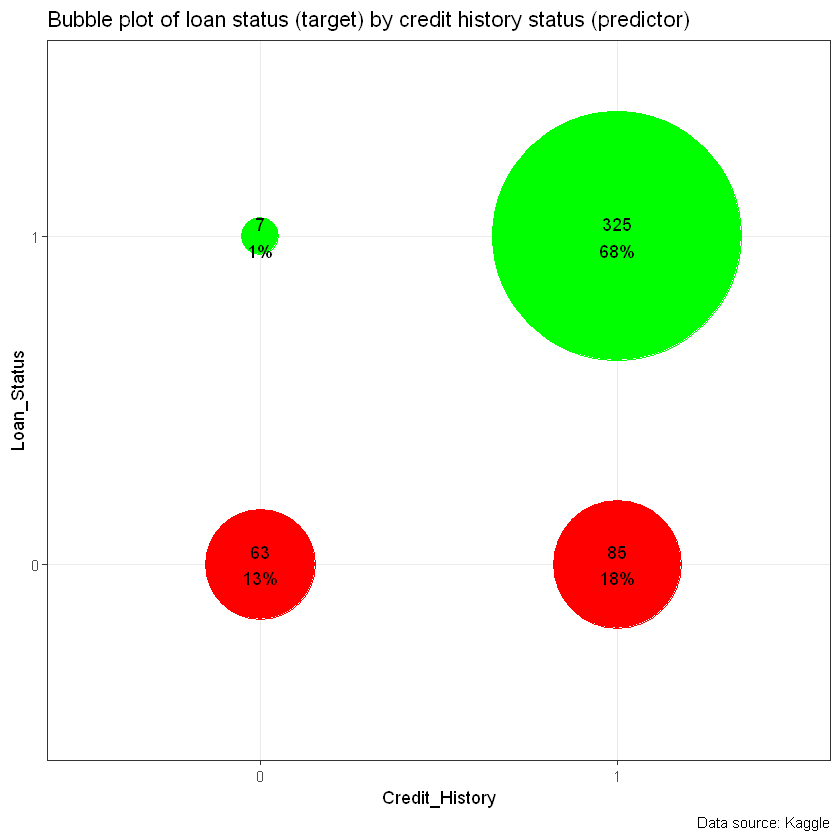

In [15]:
ggplot(M_plot) +
aes(x=Credit_History, y=Loan_Status, label=label) +
geom_point(mapping = aes(size = percent, color = Loan_Status)) +
geom_text() + 
theme_bw() +
theme(legend.position = "none") +
scale_color_manual(values = c("red", "green")) +
scale_size_area(max_size = 70) +
labs(title = "Bubble plot of loan status (target) by credit history status (predictor)",
     caption = "Data source: Kaggle")

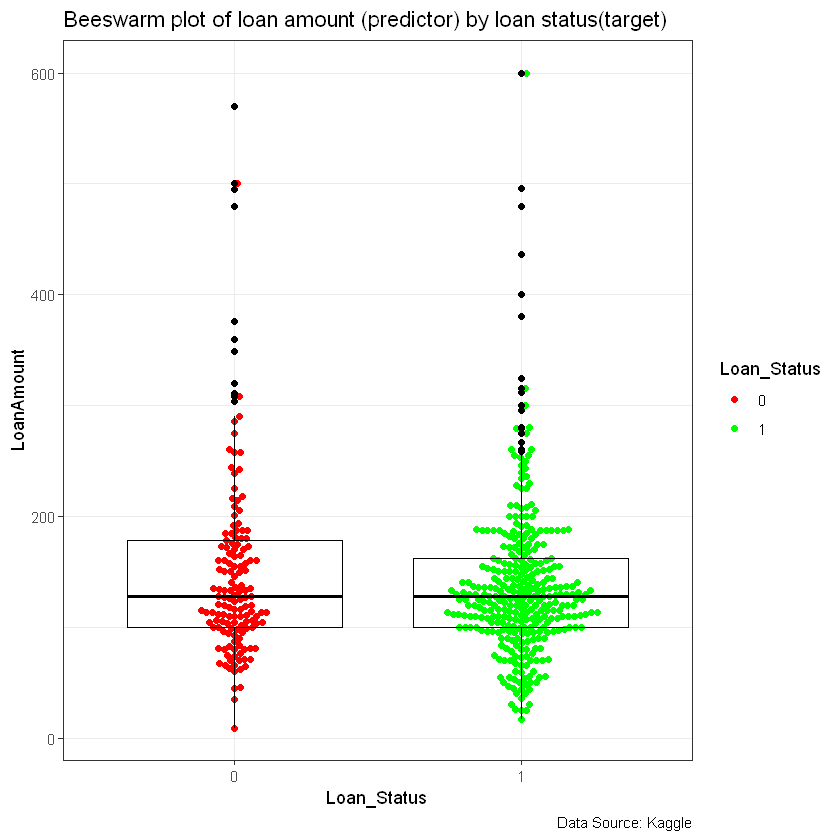

In [16]:
ggplot(df) +
aes(x=Loan_Status, y=LoanAmount, color=Loan_Status) +
ggbeeswarm::geom_beeswarm() +
geom_boxplot(color="black",fill = "#FFFFFF00") + 
theme_bw() +
scale_color_manual(values=c("red", "green")) +
labs(title = "Beeswarm plot of loan amount (predictor) by loan status(target)",
     caption = "Data Source: Kaggle")

Since the median of two different loan status groups are close to each other,
**<font size="5"> This is not a suitable plot.</font>**

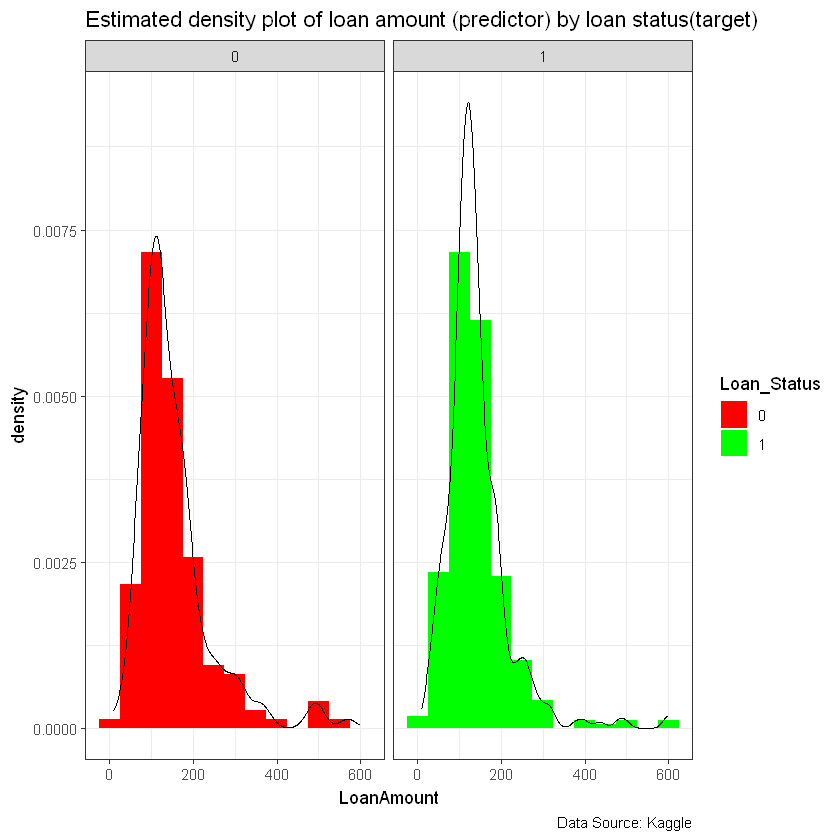

In [17]:
ggplot(df) + 
aes(x = LoanAmount, y = after_stat(density), fill = Loan_Status) + 
geom_histogram(binwidth = 50) + 
geom_density(fill = "#00000000") + 
theme_bw() +
scale_fill_manual(values = c("red", "green")) + 
facet_wrap(~Loan_Status) +
labs(title = "Estimated density plot of loan amount (predictor) by loan status(target)",
     caption = "Data Source: Kaggle")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better valu

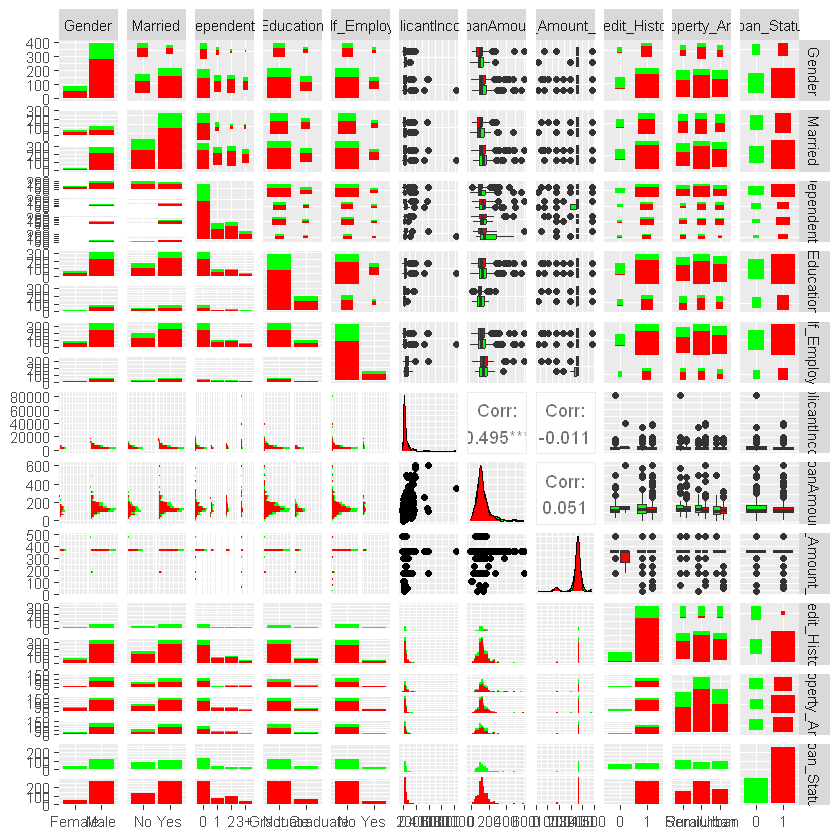

In [19]:
GGally::ggpairs(
  data = df,
  mapping = aes(
    #color = default,
    fill = Loan_Status
  )
) +
  scale_fill_manual(
    values = c(
      "green","red"
    )
  )